In [ ]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install seaborn


#GRIP done by Varshitha M#
**TASK1**:To perform EDA on a simple Superstore dataset

**AIM:**To find the weak spots in the graph and analyse the drop and rain in the profit and sales


In [2]:
# importing necessary files
import pandas as pd
import matplotlib.pyplot as ml
import numpy as np
import seaborn as sns
import plotly as pl
import plotly.express as px

In [3]:
#Reading the dataset (or) importing dataset
data= pd.read_csv("retail.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
data.shape

(9994, 13)

In [7]:
#to bring out data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Once the data iformation and the describing is done ,Now inorder to avoid complexity in the dataset that may slow done the compilation of the code we will remove all the redundent and duplication the data.

But before removing the redundent datas we will check for columns if they contain NULL values or not.So that if they have we can eremove thta column to avoid confusion and errors

In [9]:
#checking for NULL values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data.drop_duplicates(inplace=True)
data.shape

(9977, 13)

In [11]:
retails= data.drop(['Country','Postal Code'],axis=1)
print(retails)

           Ship Mode    Segment             City  ... Quantity Discount    Profit
0       Second Class   Consumer        Henderson  ...        2     0.00   41.9136
1       Second Class   Consumer        Henderson  ...        3     0.00  219.5820
2       Second Class  Corporate      Los Angeles  ...        2     0.00    6.8714
3     Standard Class   Consumer  Fort Lauderdale  ...        5     0.45 -383.0310
4     Standard Class   Consumer  Fort Lauderdale  ...        2     0.20    2.5164
...              ...        ...              ...  ...      ...      ...       ...
9989    Second Class   Consumer            Miami  ...        3     0.20    4.1028
9990  Standard Class   Consumer       Costa Mesa  ...        2     0.00   15.6332
9991  Standard Class   Consumer       Costa Mesa  ...        2     0.20   19.3932
9992  Standard Class   Consumer       Costa Mesa  ...        4     0.00   13.3200
9993    Second Class   Consumer      Westminster  ...        2     0.00   72.9480

[9977 rows x 11

In [12]:
retails.shape

(9977, 11)

In [13]:
retails.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


This is just to see thr corelation between thr random variables

In [14]:
# relationship analysis
# corelationship matrix
corelation= retails.corr()

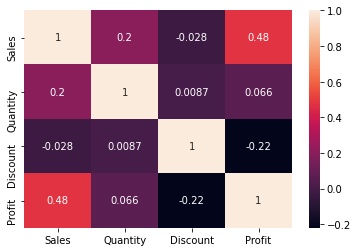

In [15]:
sns.heatmap(corelation,annot=True)

To understand which variable is better for understanding the marketing graph ill be using pairplot(), after which can use the required plot for the desired ouput

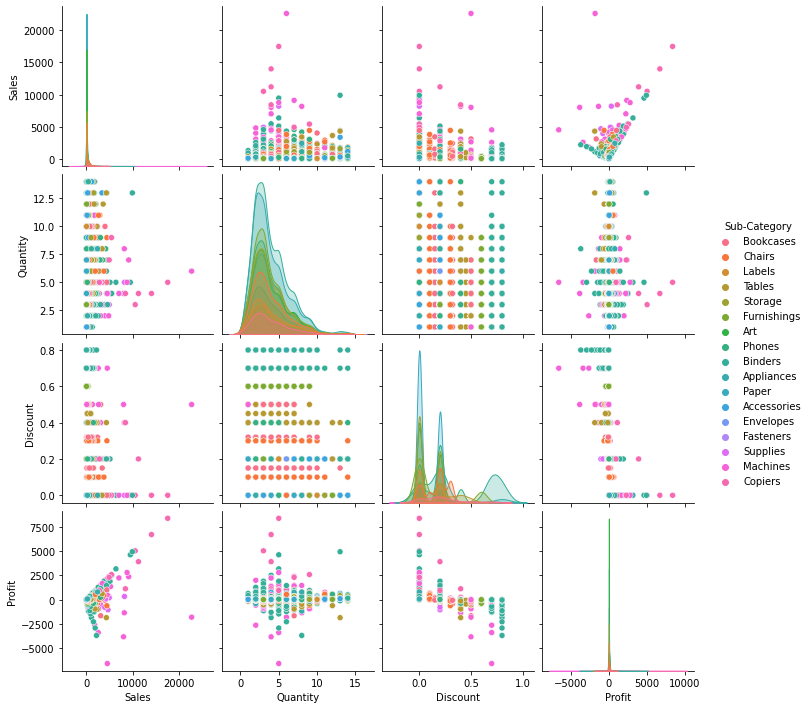

In [28]:
sns.pairplot(retails,hue='Sub-Category')

Now we easly take decision on which variables to be used for ploting

There are several forms of ploting we will plot some them to understand and know how it looks

Analysis on Sales vs other variables

This to understand how sales effercts the rest of the varaibles

We will be using Categorical plot

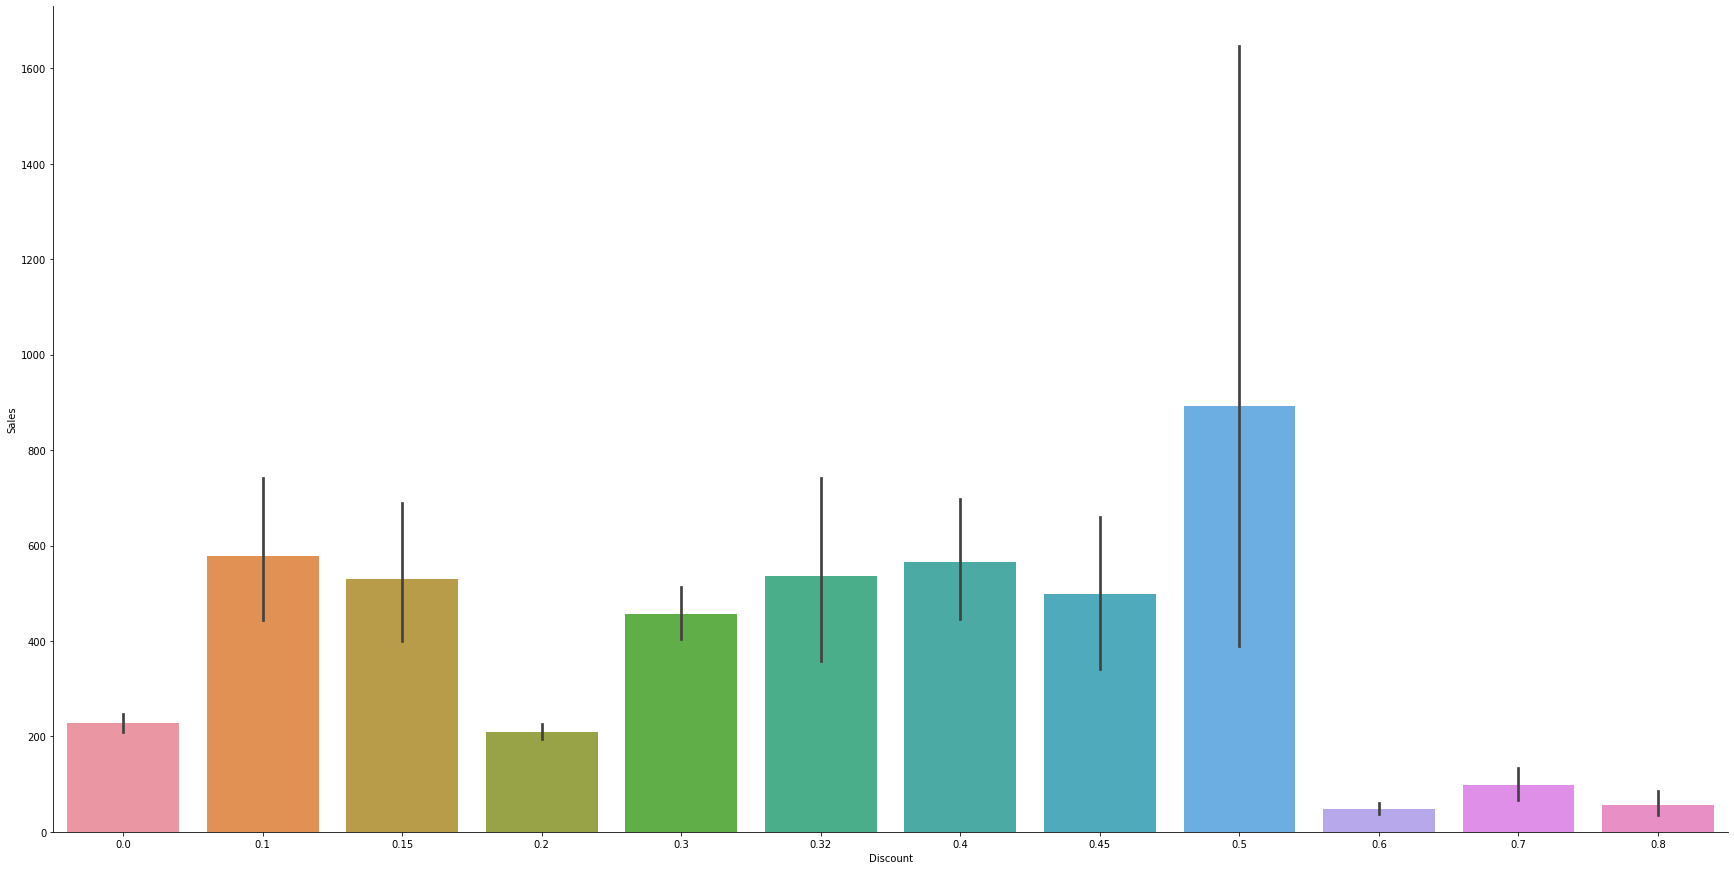

In [17]:
# Analysis on Sales vs Descount
sns.catplot(x='Discount',y='Sales',kind='bar',data=retails,height=12,aspect=2)

# sns.boxplot(y = retails['Discount'], x = retails['Sales'] , data=retails,width=6)

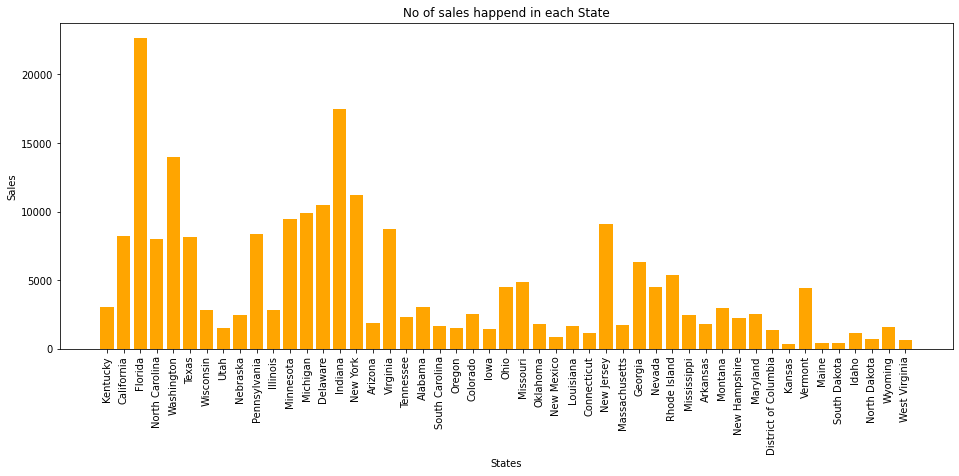

In [18]:
#  sns.catplot(x='State',y='Sales',kind='bar',data=retails,height=10,aspect=2,)
ml.figure(figsize=(16,6))
ml.bar('State','Sales',data=retails,color='orange')
ml.title('No of sales happend in each State')
ml.xlabel('States')
ml.ylabel('Sales')
ml.xticks(rotation=90)
ml.show()

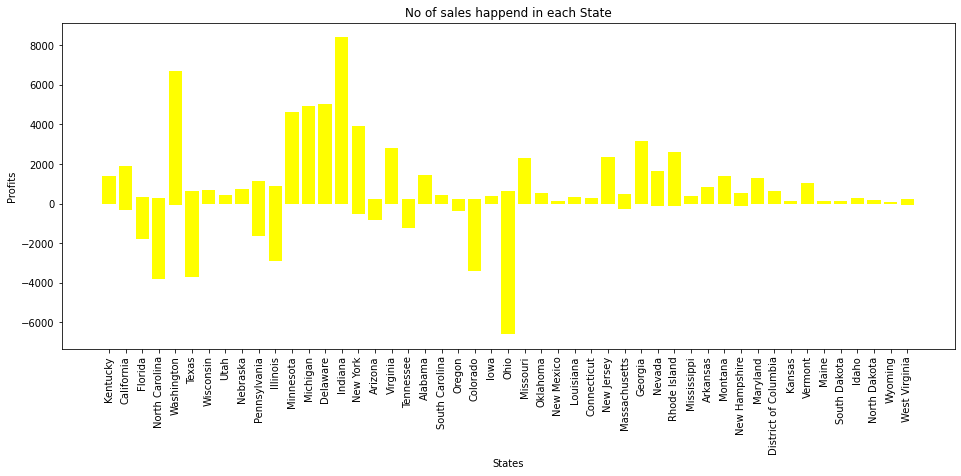

In [19]:
# what is the profit gained or losses occured after the sales in each state
ml.figure(figsize=(16,6))
ml.bar('State','Profit',data=retails,color='yellow')
ml.title('No of sales happend in each State')
ml.xlabel('States')
ml.ylabel('Profits')
ml.xticks(rotation=90)
ml.show()
# sns.barplot(x='Profit',y='States',hue='Quantity',data=retails)

In [20]:
retails.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



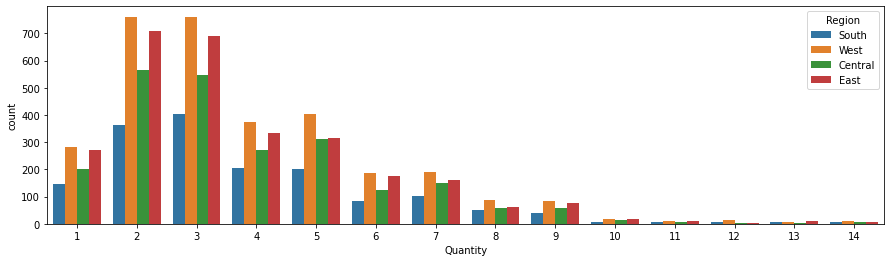

In [21]:
fig,ax= ml.subplots(1,1,figsize=(15,4))
sns.countplot(retails['Quantity'],hue=retails['Region'])
ml.show()

##Next we will do a study on the categories and sub-Categories suppled in each state 

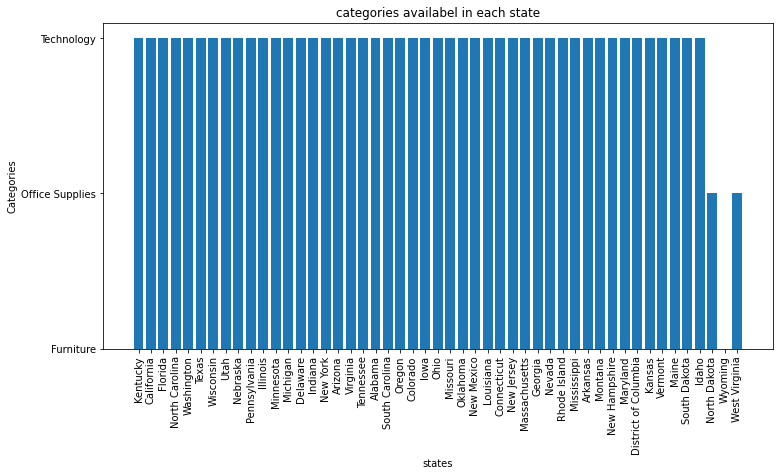

In [29]:
ml.figure(figsize=(12,6))
ml.bar('State','Category',data=retails)
ml.title('categories availabel in each state')
ml.ylabel('Categories')
ml.xlabel('states')
ml.xticks(rotation=90)
ml.show()
# states= retails['Category'];
# ml.pie('Sales',labels=states, data=retails)
# ml.show()

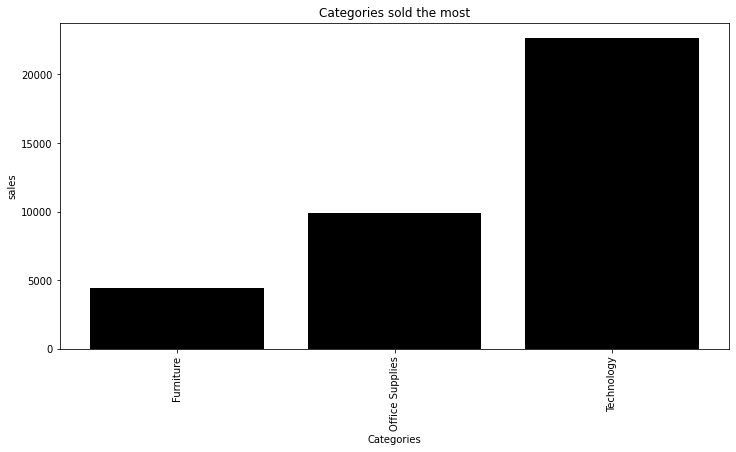

In [31]:
ml.figure(figsize=(12,6))
ml.bar('Category','Sales',data=retails,color='black')
ml.title('Categories sold the most')
ml.xlabel('Categories')
ml.ylabel('sales')
ml.xticks(rotation=90)
ml.show()

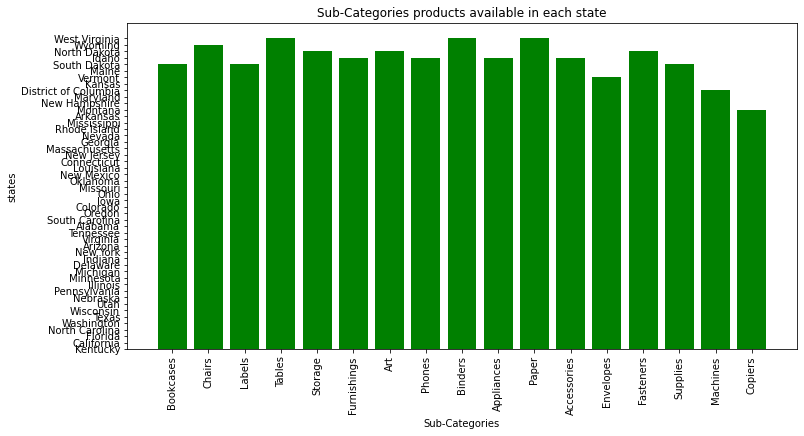

In [24]:
ml.figure(figsize=(12,6))
ml.bar('Sub-Category','State',data=retails,color='green')
ml.title('Sub-Categories products available in each state')
ml.xlabel('Sub-Categories')
ml.ylabel('states')
ml.xticks(rotation=90)
ml.show()

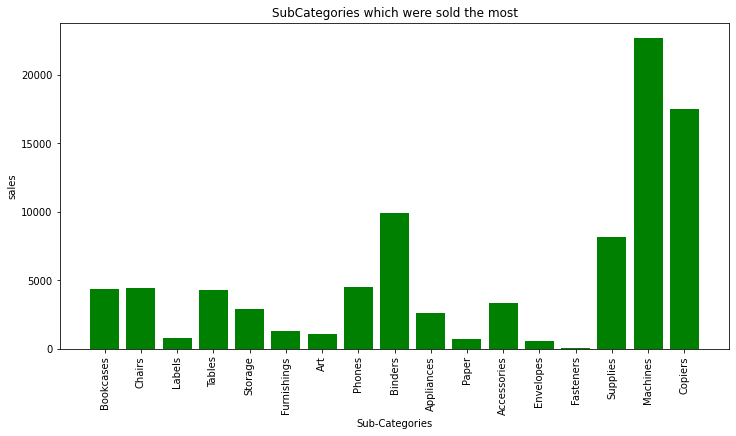

In [25]:
ml.figure(figsize=(12,6))
ml.bar('Sub-Category','Sales',data=retails,color='green')
ml.title('SubCategories which were sold the most')
ml.xlabel('Sub-Categories')
ml.ylabel('sales')
ml.xticks(rotation=90)
ml.show()

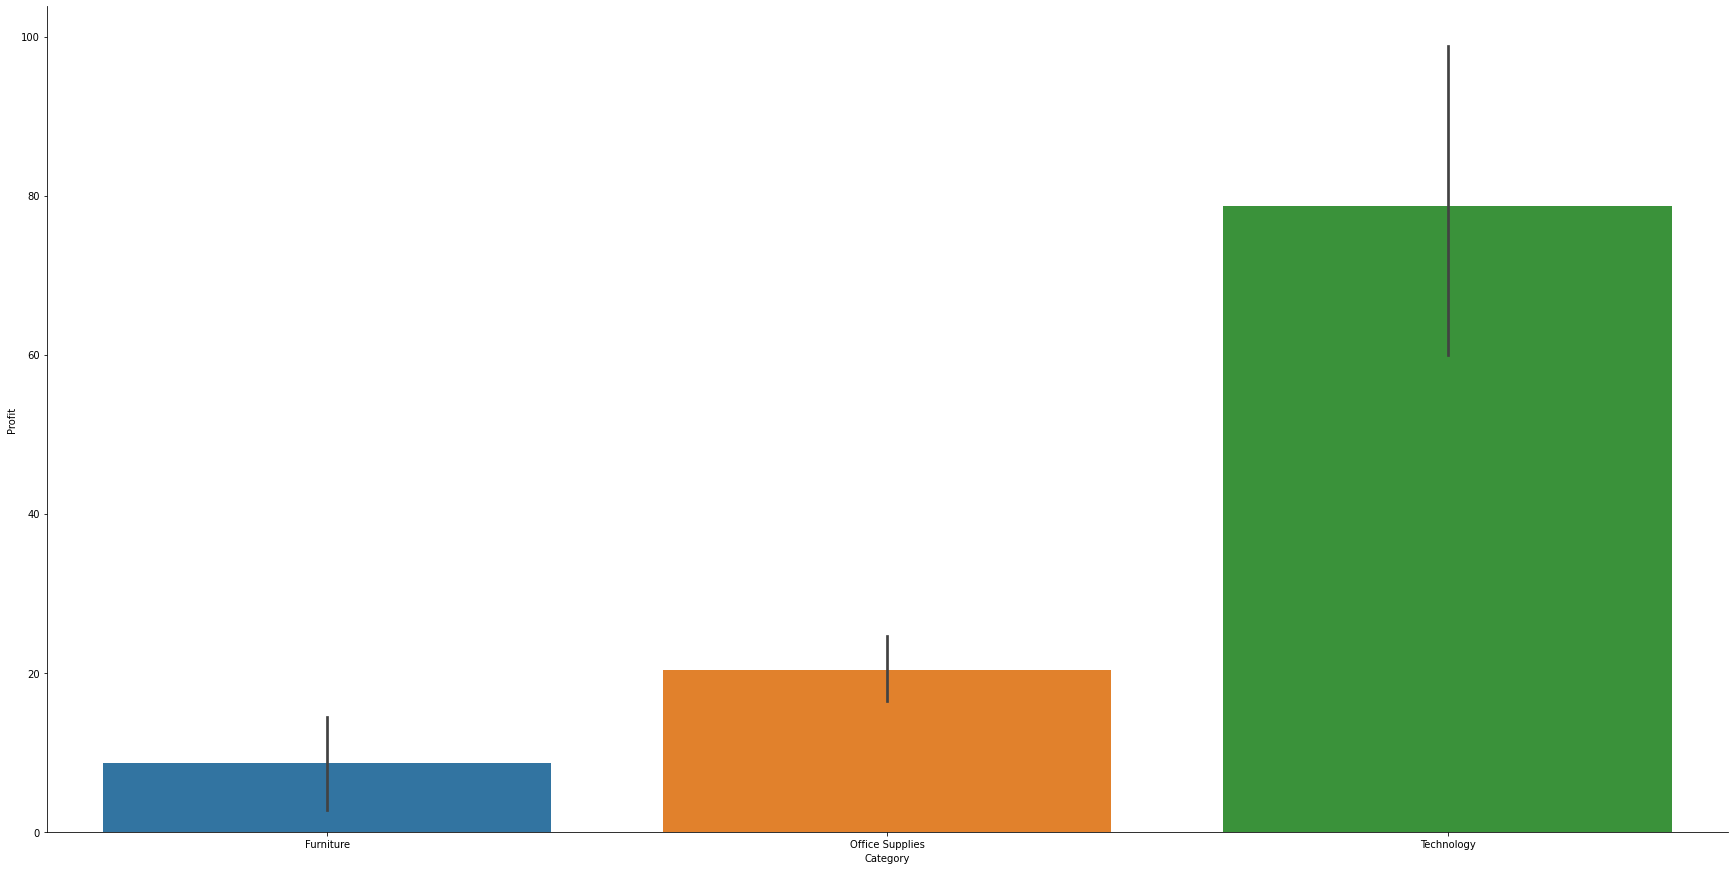

In [26]:
# ml.figure(figsize=(12,6))
# ml.bar('Category','Profit',data=retails,color='blue')
# ml.title('Based on the categories profits earned')
# ml.xlabel('Categories')
# ml.ylabel('Profits')
# ml.xticks(rotation=90)
# ml.show()

sns.catplot(x='Category',y='Profit',kind='bar',data=retails,height=12,aspect=2)

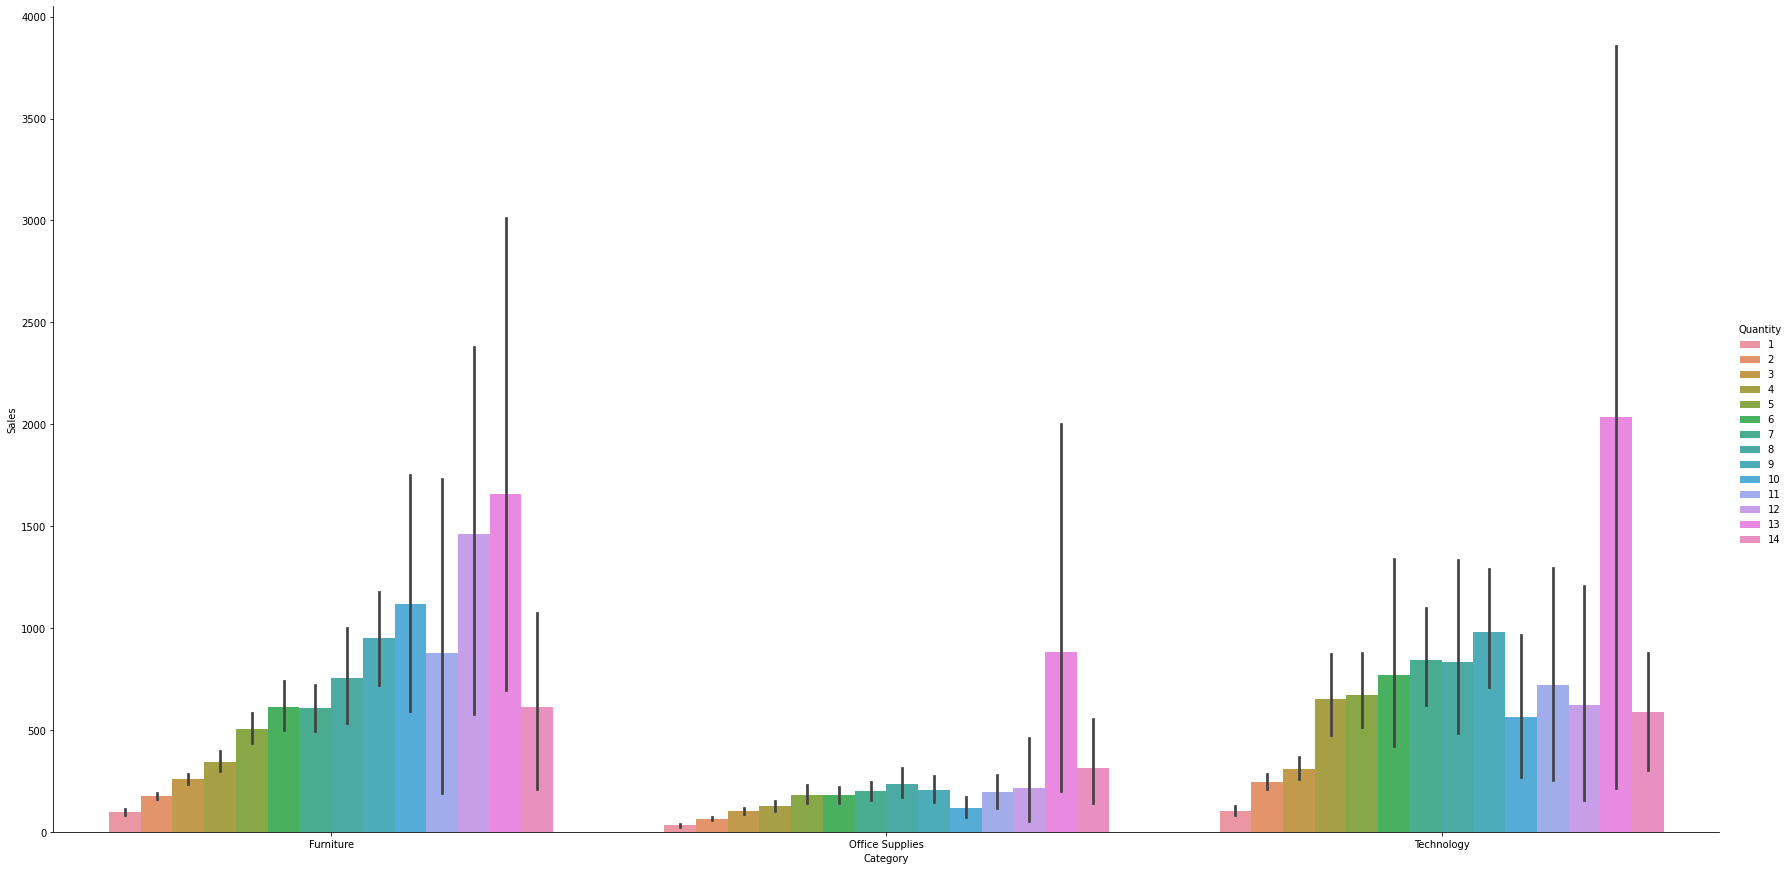

In [27]:
sns.catplot(x='Category',y='Sales',hue='Quantity',kind='bar',data=retails,height=12,aspect=2)

### conclusion 
i conclude telling that we understood how many various aspects wrt categories and its sub , how are sales happening in each states and in each region and so on